<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.10 Autocorrelation
Autocorrelation is the correlation of a signal with itself. This tells the how a signal is related in time or space. This can be used to see the periodicity in the signal. To demonstrate this, we will first generate a signal using sine with a periodicity of $4\pi$ and magnitude of 2. Below figure  shows the signal in upper panel, and autocorrelation in lower panel. The autocorrelation is plotted using
the *plt.acorr* function. We have shown the grid in the plot using the plt.grid function. The horizontal lines at 0 and *exp(-1)* are plotted using the *plt.axhline*. Autocorrelation is showing a nice periodic behaviour with a periodicity of $4\pi$.

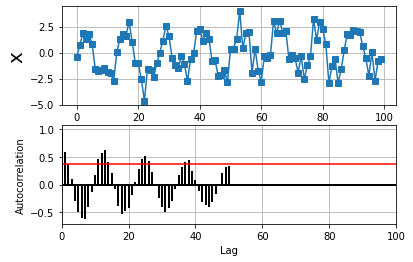

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = 2*np.sin(np.arange(100)/2.0) # periodic signal
x += np.random.randn(len(x)) # corrupted with noise

plt.subplot(2,1,1)
plt.plot(x, '-s')
plt.ylabel('x', fontsize=20)
plt.grid(True)
plt.xlabel('Time')

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

Autocorrelation function is also used to compute the correlation length. Correlation length is the
distance from a point beyond which there is no further correlation of a physical property associated
with that point. Mathematically, the correlation length is the lag at which autocorrelation is equal to $\exp(-1)$, which is shown by a horizontal red line in the plot. Let us make a plot with higher periodicity to compute correlation length. The resulted plot is shown in below figure. Graphically we see that
correlation is approximately equal to 9.

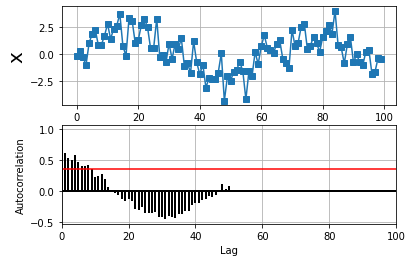

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.sin(np.arange(100)/10.0) # periodic signal
x += np.random.randn(len(x)) # corrupted with noise

plt.subplot(2,1,1)
plt.plot(x, '-s')
plt.ylabel('x', fontsize=20)
plt.grid(True)
plt.xlabel('Time')

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

To precisely determine the correlation length, we would be fitting a interpolation function between lag and correlation length, and then determine the lag where autocorrelation becomes $\exp(-1)$. The *plt.acorr* function return lags and autocorrelation at these lags. First we will assign lags and
correlation to separate variables. We also print the lags to see what is inside it.

In [10]:
lags = c[0] # lags
auto_corr = c[1] # autocorrelation
print(auto_corr)

[ 0.08361858  0.04189258  0.11406874  0.00932784 -0.05564388 -0.0947209
 -0.06687509 -0.12368773 -0.14373067 -0.18403542 -0.17982488 -0.21593656
 -0.31102199 -0.31339566 -0.36373758 -0.3609333  -0.42796796 -0.40694516
 -0.39685114 -0.45041188 -0.41445866 -0.41910755 -0.33683381 -0.3552065
 -0.35315465 -0.35203934 -0.25371214 -0.29369812 -0.28916292 -0.1516304
 -0.12525666 -0.1507045  -0.12799393 -0.0651774  -0.0195525   0.00705685
  0.06789019  0.19600523  0.27589313  0.25392749  0.22539749  0.36216241
  0.42658963  0.41517994  0.40956497  0.46675989  0.58307185  0.51015509
  0.5313088   0.62289861  1.          0.62289861  0.5313088   0.51015509
  0.58307185  0.46675989  0.40956497  0.41517994  0.42658963  0.36216241
  0.22539749  0.25392749  0.27589313  0.19600523  0.06789019  0.00705685
 -0.0195525  -0.0651774  -0.12799393 -0.1507045  -0.12525666 -0.1516304
 -0.28916292 -0.29369812 -0.25371214 -0.35203934 -0.35315465 -0.3552065
 -0.33683381 -0.41910755 -0.41445866 -0.45041188 -0.3968

The acorr provides positive and negative lags. We don’t need both, we can get rid of it by giving an index which is in boolean format and is obtained by using the statement lags>=0. We also remove the autocorrelation array which corresponds to negative lags.

In [11]:
auto_corr = auto_corr[lags>=0]
lags = lags[lags>=0]

Now, we need the autocorrelation at two point, one just above the threshold, and one just below the
threshold. We get their indices by counting how many times the auto correlation is above threshold.

In [12]:
n = sum(auto_corr>np.exp(-1))
print(n)


9


One point is at 8th indices, and another is at 9th indices. Now, we can use interp1d to get the value
of exact lag when autocorrelation is equal to threshold. This provides the correlation length which
is 8.65.


In [13]:
from scipy.interpolate import interp1d
f = interp1d([auto_corr[n], auto_corr[n-1]], [lags[n], lags[n-1]])
corr_len = f(np.exp(-1))
print(corr_len)

8.911263708691164
